# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [342]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [343]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [344]:
# find all the shapes of the df's and name them rows and columns
print(f"Tesla rows and columns: {df_tesla.shape}")
print(f"Bitcoin search rows and columns: {df_btc_search.shape}")
print(f"Bitcoin price rows and columns: {df_btc_price.shape}")
print(f"Unemployment rows and columns: {df_unemployment.shape}")

# print the column names in a readable format
print(f"Tesla column names: {df_tesla.columns}")
print(f"Bitcoin search column names: {df_btc_search.columns}")
print(f"Bitcoin price column names: {df_btc_price.columns}")
print(f"Unemployment column names: {df_unemployment.columns}")

Tesla rows and columns: (124, 3)
Bitcoin search rows and columns: (73, 2)
Bitcoin price rows and columns: (2204, 3)
Unemployment rows and columns: (181, 3)
Tesla column names: Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')
Bitcoin search column names: Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')
Bitcoin price column names: Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')
Unemployment column names: Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')


In [345]:
largest_tesla_web_search = df_tesla['TSLA_WEB_SEARCH'].max()
smallest_tesla_web_search = df_tesla['TSLA_WEB_SEARCH'].min()

print(f'Largest value for Tesla in Web Search: {largest_tesla_web_search}')
print(f'Smallest value for Tesla in Web Search: {smallest_tesla_web_search}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [346]:
# describe() all df
print(df_tesla.describe())
print("============================")
print(df_btc_search.describe())
print("============================")
print(df_btc_price.describe())
print("============================")
print(df_unemployment.describe())

       TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007
       BTC_NEWS_SEARCH
count        73.000000
mean         15.013699
std          15.146959
min           3.000000
25%           5.000000
50%          14.000000
75%          18.000000
max         100.000000
              CLOSE        VOLUME
count   2203.000000  2.203000e+03
mean    4429.421245  8.043622e+09
std     4148.150071  1.176529e+10
min      178.102997  5.914570e+06
25%      433.629502  6.029915e+07
50%     3637.520020  2.018890e+09
75%     7997.372803  1.322478e+10
max    19497.400391  7.415677e+10
       UE_BENEFITS_WEB_SEARCH      UNRATE
count              181.000000  181.000000
mean                35.110497    6.217680
std       

In [347]:
# What is the periodicity of the time series data (daily, weekly, monthly)?
# print the first 5 rows of each df
print(df_tesla.head())
print("============================")
print(df_btc_search.head())
print("============================")
print(df_btc_price.head())
print("============================")
print(df_unemployment.head())

        MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
3  2010-09-01                2           4.082
4  2010-10-01                2           4.368
     MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5
         DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
3  2014-09-20  408.903992  36863600.0
4  2014-09-21  398.821014  26580100.0
     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                      34     5.7
1  2004-02                      33     5.6
2  2004-03                      25     5.8
3  2004-04                      29     5.6
4  2004-05                      23     5.6


### Unemployment Data

In [348]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [349]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [350]:
print(df_btc_price.head())

         DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
3  2014-09-20  408.903992  36863600.0
4  2014-09-21  398.821014  26580100.0


In [351]:
print(df_btc_search.head())

     MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5


In [352]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [353]:
print(f'Missing values for Tesla?: {df_tesla.isnull().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isnull().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isnull().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [354]:
print(f'Missing values for BTC price?: {df_btc_price.isnull().values.any()}')

Missing values for BTC price?: True


In [355]:
print(f'Number of missing values: {df_btc_price.isnull().sum().sum()}')

Number of missing values: 2


**Challenge**: Remove any missing values that you found. 

In [356]:
# Reset index, moving the old index to a new column
df_btc_price.reset_index(drop=False, inplace=True)

# Drop NaNs
df_btc_price.dropna(inplace=True)

print(f'Missing values for BTC price?: {df_btc_price.isnull().values.any()}')
print(df_btc_price.head())

Missing values for BTC price?: False
   index        DATE       CLOSE      VOLUME
0      0  2014-09-17  457.334015  21056800.0
1      1  2014-09-18  424.440002  34483200.0
2      2  2014-09-19  394.795990  37919700.0
3      3  2014-09-20  408.903992  36863600.0
4      4  2014-09-21  398.821014  26580100.0


In [357]:
df_btc_price.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203],
      dtype='int64', length=2203)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [358]:
# check the type of the date column of every df
print(df_tesla.dtypes)
print("-------------------------------")
print(df_btc_search.dtypes)
print("-------------------------------")
print(df_btc_price.columns)
print("-------------------------------")
print(df_unemployment.dtypes)

MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object
-------------------------------
MONTH              object
BTC_NEWS_SEARCH     int64
dtype: object
-------------------------------
Index(['index', 'DATE', 'CLOSE', 'VOLUME'], dtype='object')
-------------------------------
MONTH                      object
UE_BENEFITS_WEB_SEARCH      int64
UNRATE                    float64
dtype: object


In [359]:
# change the date column to datetime
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])

In [360]:
print(df_tesla.dtypes)
print("-------------------------------")
print(df_btc_search.dtypes)
print("-------------------------------")
print(df_btc_price.head())
print("-------------------------------")
print(df_unemployment.dtypes)

MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object
-------------------------------
MONTH              datetime64[ns]
BTC_NEWS_SEARCH             int64
dtype: object
-------------------------------
   index       DATE       CLOSE      VOLUME
0      0 2014-09-17  457.334015  21056800.0
1      1 2014-09-18  424.440002  34483200.0
2      2 2014-09-19  394.795990  37919700.0
3      3 2014-09-20  408.903992  36863600.0
4      4 2014-09-21  398.821014  26580100.0
-------------------------------
MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [361]:
# using resample() to aggregate the data turn the data into monthly
df_btc_price = df_btc_price.resample('M', on='DATE').mean()

In [362]:
df_btc_price

,index,CLOSE,VOLUME
DATE,,,
2014-09-30,6.5,407.182428,2.934864e+07
2014-10-31,29.0,364.148873,2.912885e+07
2014-11-30,59.5,366.099799,2.199111e+07
2014-12-31,90.0,341.267871,1.784201e+07
2015-01-31,121.0,248.782547,3.544555e+07
...,...,...,...
2020-05-31,2068.0,9263.151745,4.149575e+10
2020-06-30,2098.5,9489.227214,2.169711e+10
2020-07-31,2129.0,9589.899729,1.760688e+10


# Data Visualisation

### Notebook Formatting & Style Helpers

In [363]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()  # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

In [364]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

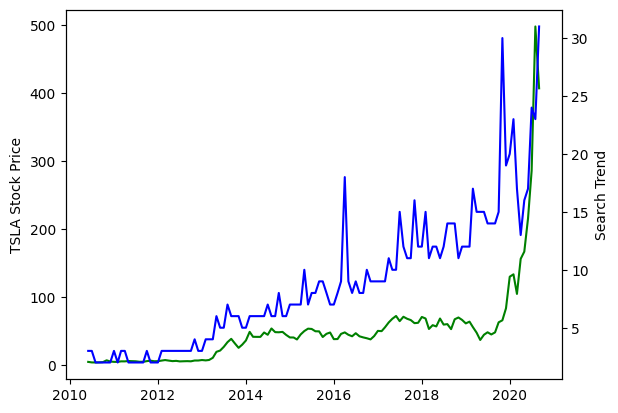

In [365]:
# Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. 
# Label one axis 'TSLA Stock Price' and the other 'Search Trend'
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price')
ax2.set_ylabel('Search Trend')

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='g')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='b')
plt.show()

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

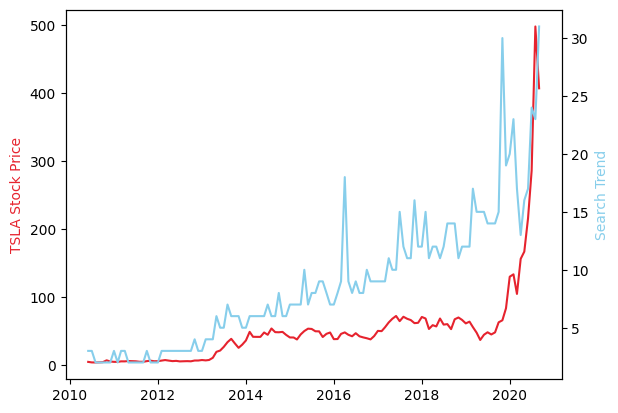

In [366]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#E6232E') # can use a HEX code
ax2.set_ylabel('Search Trend', color='skyblue') # or a named colour
 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue')

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

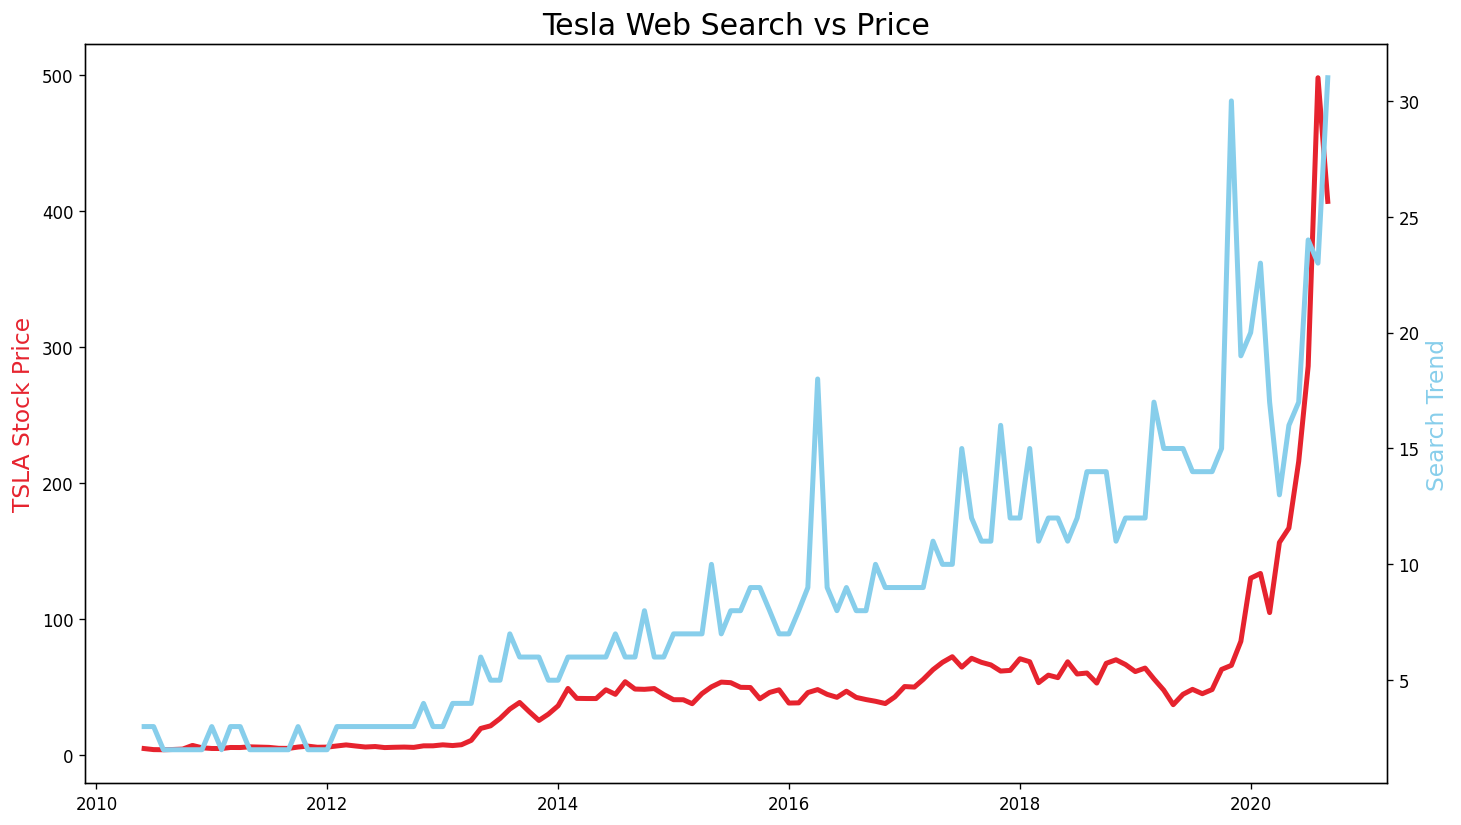

In [367]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Tesla Web Search vs Price', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
# Also, increase fontsize and linewidth for larger charts
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)
 
# Displays chart explicitly
plt.show()

How to add tick formatting for dates on the x-axis. 

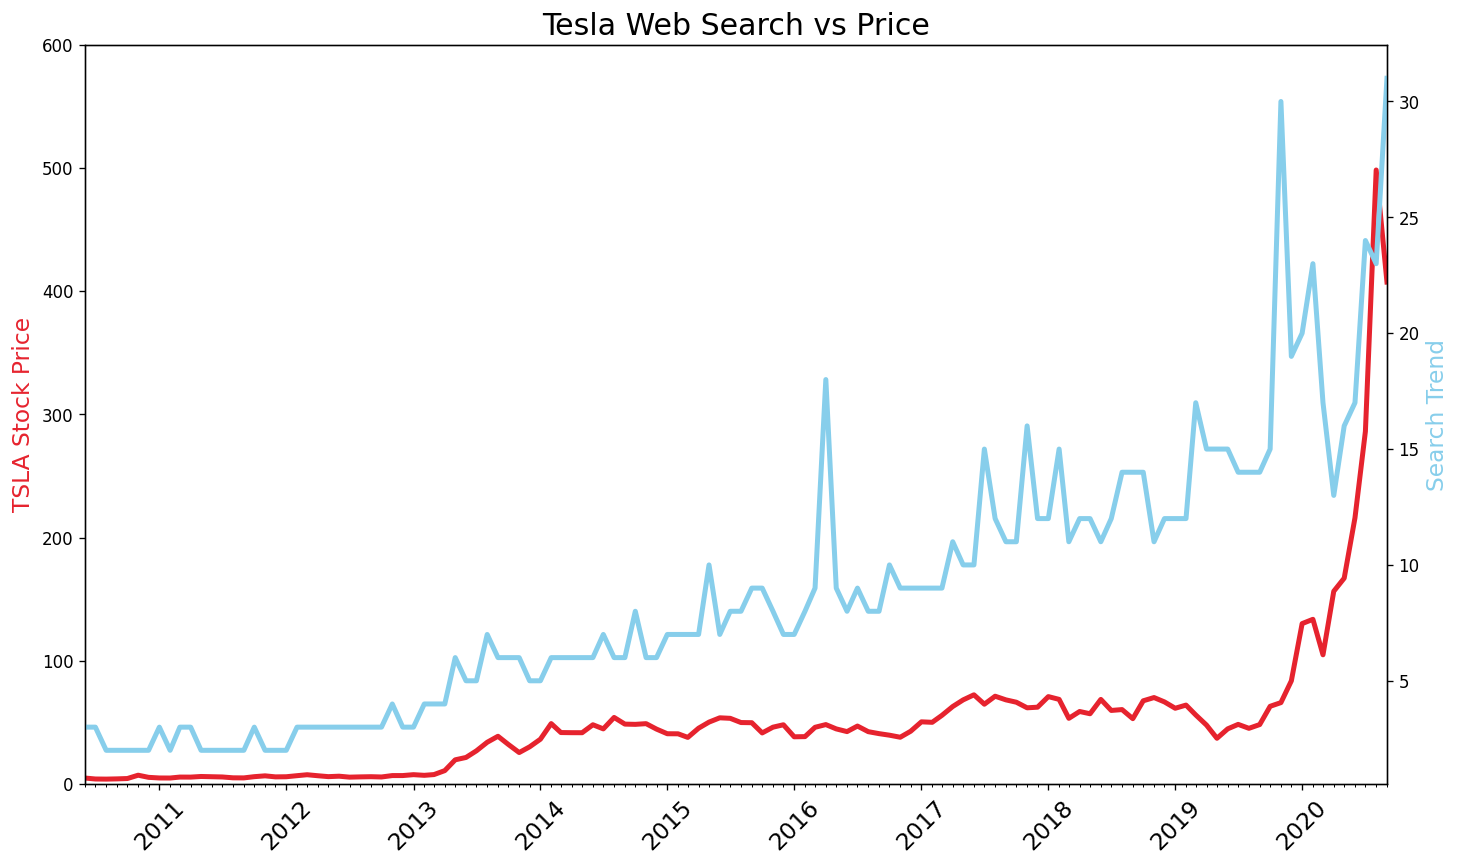

In [368]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)
 
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [369]:
# print(df_btc_search.head())
# print("-----------------------------")
# # rename the columns of df_btc_price to MONTH, BTC_PRICE
# df_btc_price.columns = ['MONTH', 'BTC_PRICE'] 
# print(df_btc_price.head())

AttributeError: 'DataFrame' object has no attribute 'DATE'

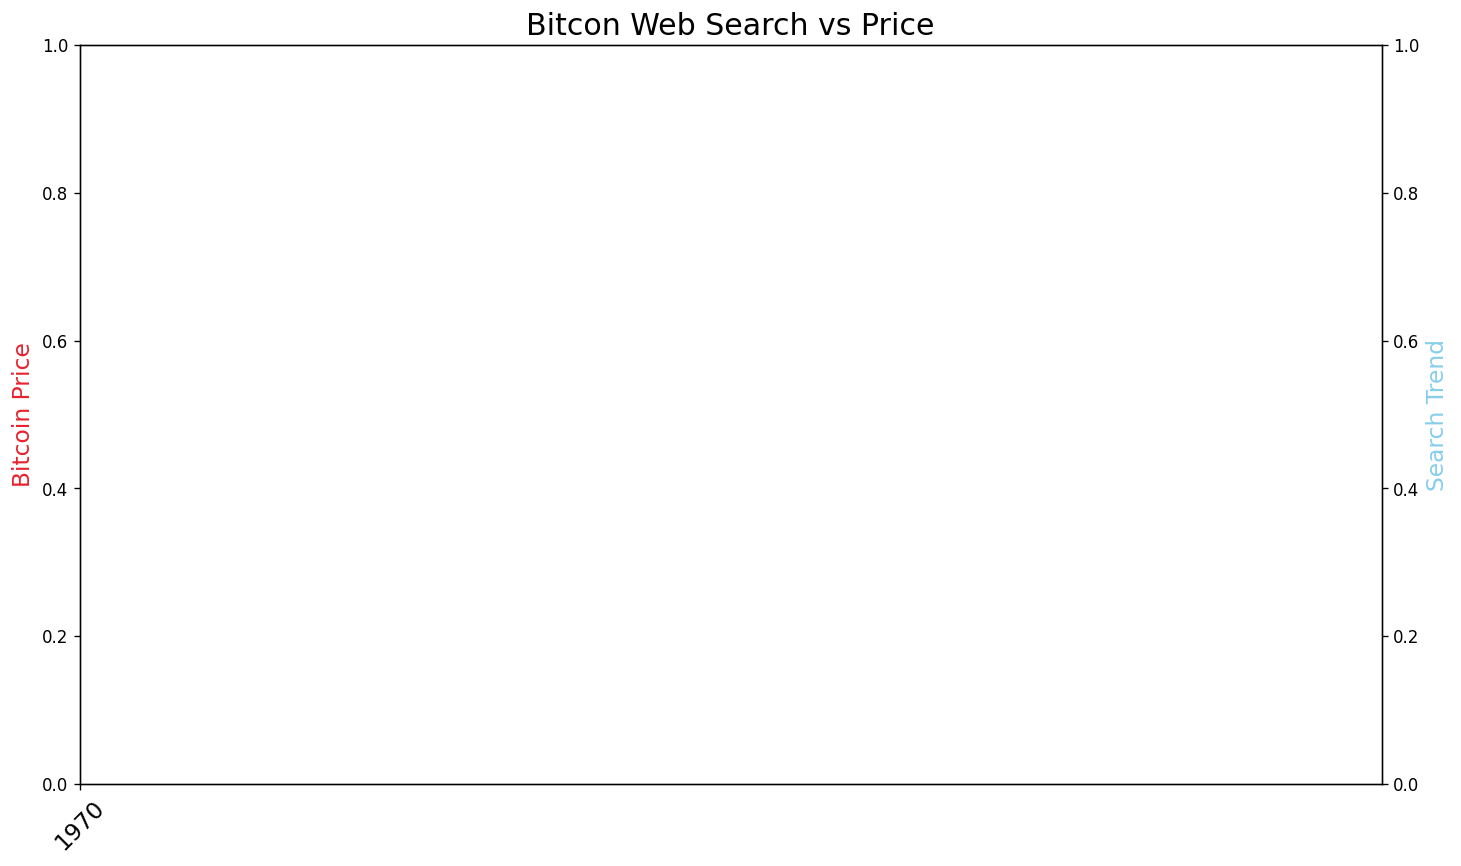

In [370]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Bitcon Web Search vs Price', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylabel('Bitcoin Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
ax1.plot(df_btc_price.DATE, df_btc_price.BTC_PRICE, color='#E6232E', linewidth=3, marker='o')
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color='skyblue', linewidth=3, linestyle='--')
 
plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

In [371]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


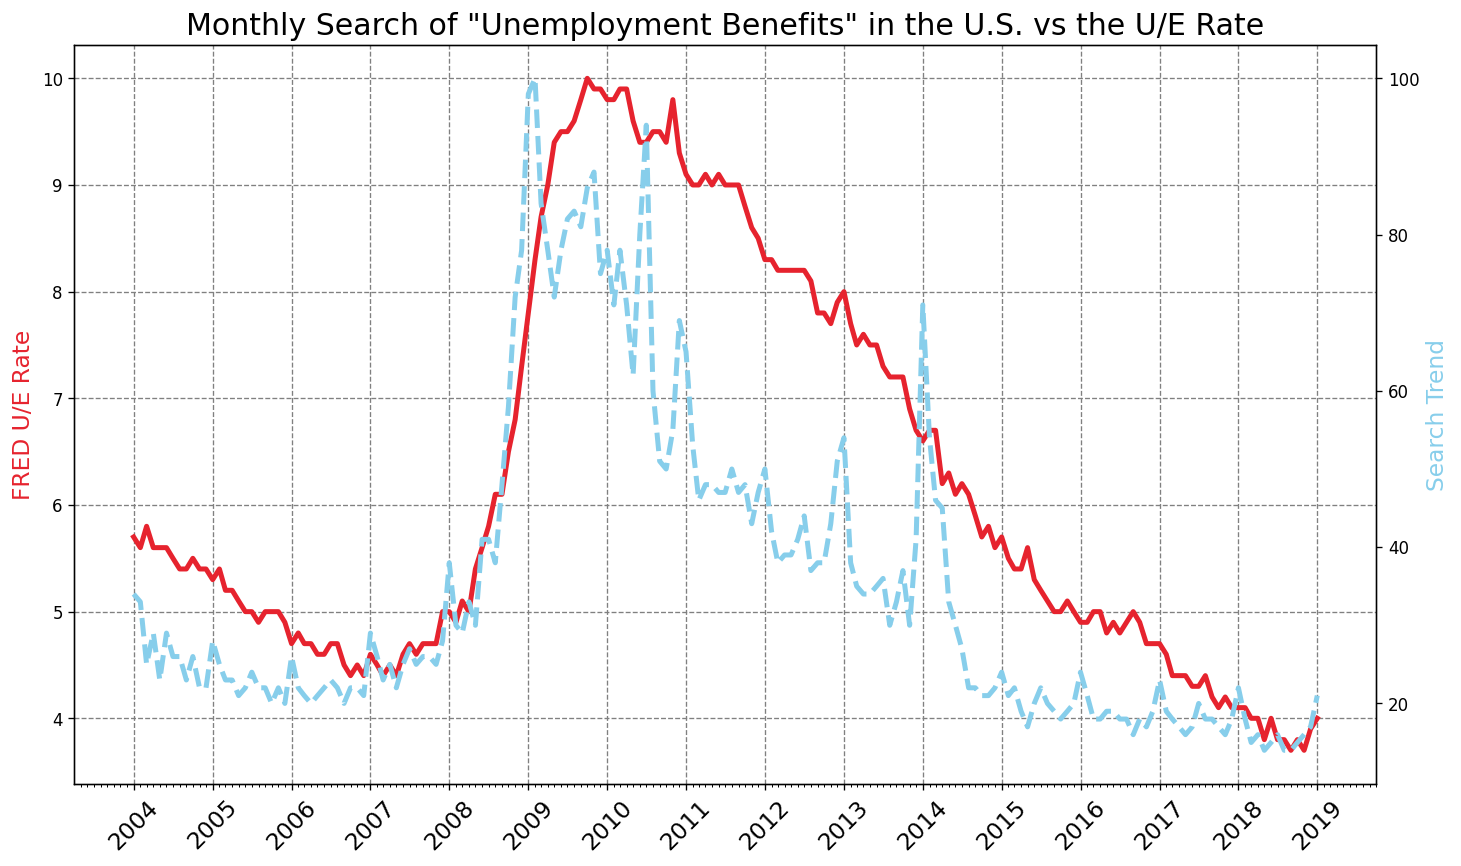

In [372]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylabel('FRED U/E Rate', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

# add a gray grid to the chart
ax1.grid(color='gray', linestyle='--')
 
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='#E6232E', linewidth=3)
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3, linestyle='--')
 
plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [373]:
# Calculate the 6-month rolling average for the web searches of df_unemployment
# roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
# roll_df.head(10)


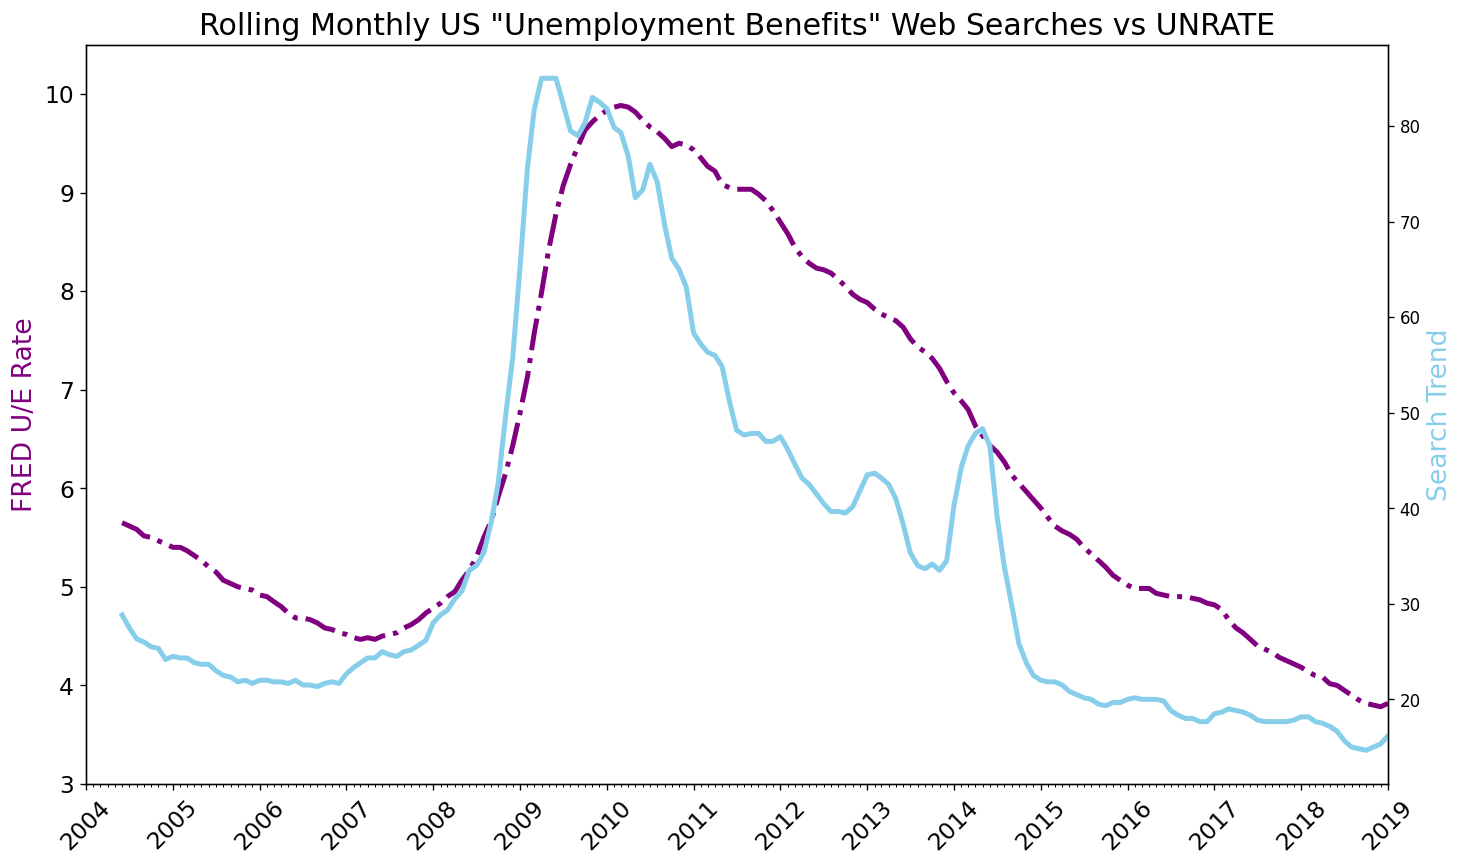

In [374]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])
 
# Calculate the rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
 
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')
Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')
MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object
MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object


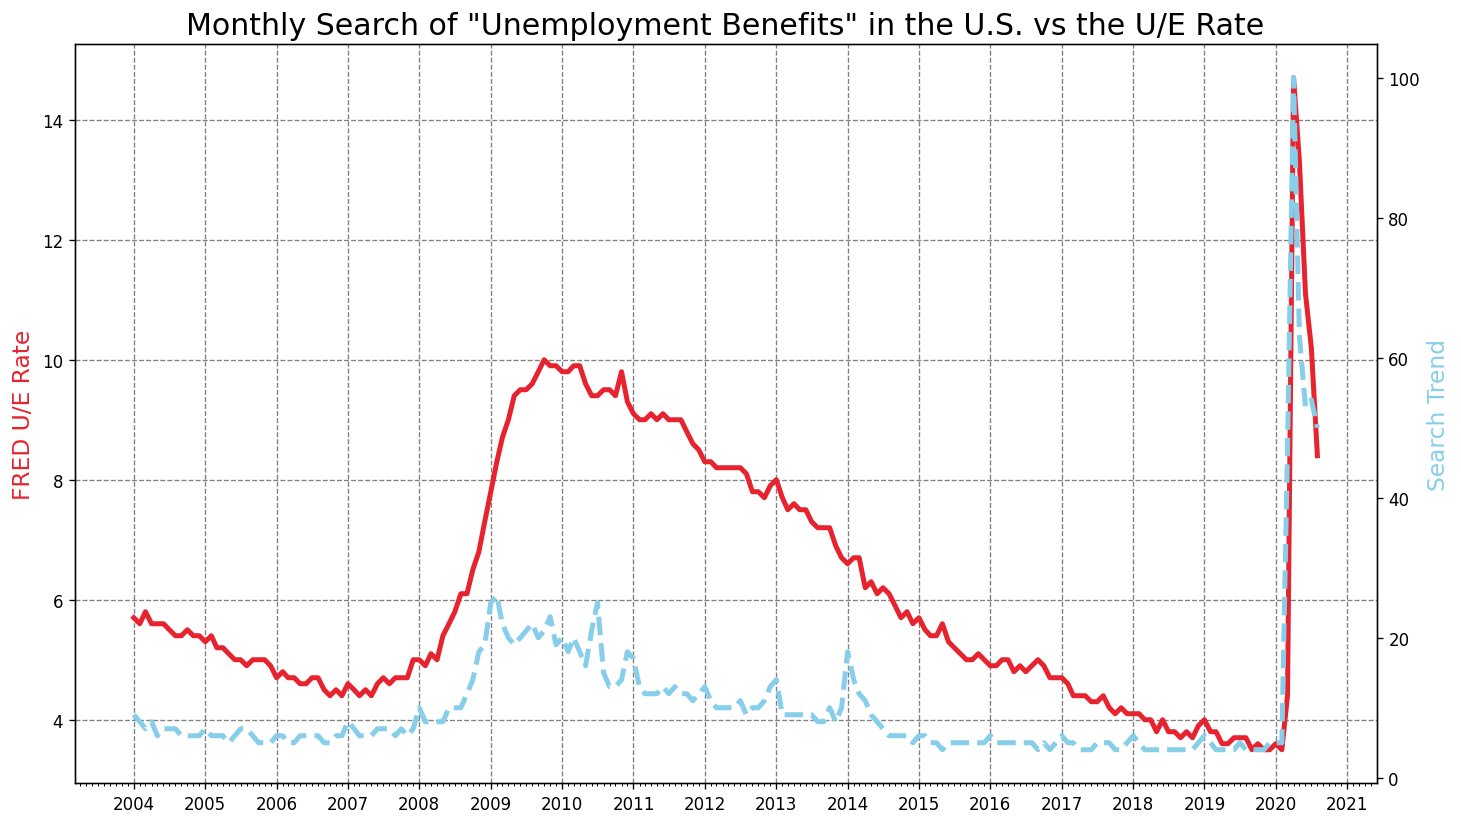

In [376]:
# Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. 
# Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?
df_UE_Benefits_Search_vs_UE_Rate_2004_19 = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')
df_UE_Benefits_Search_vs_UE_Rate_2004_20 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

print(df_UE_Benefits_Search_vs_UE_Rate_2004_19.columns)
print(df_UE_Benefits_Search_vs_UE_Rate_2004_20.columns)

df_UE_Benefits_Search_vs_UE_Rate_2004_19.MONTH = pd.to_datetime(df_UE_Benefits_Search_vs_UE_Rate_2004_19.MONTH)
df_UE_Benefits_Search_vs_UE_Rate_2004_20.MONTH = pd.to_datetime(df_UE_Benefits_Search_vs_UE_Rate_2004_20.MONTH)

print(df_UE_Benefits_Search_vs_UE_Rate_2004_19.dtypes)
print(df_UE_Benefits_Search_vs_UE_Rate_2004_20.dtypes)

# plot the chart
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylabel('FRED U/E Rate', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

# add a gray grid to the chart
ax1.grid(color='gray', linestyle='--')

ax1.plot(df_UE_Benefits_Search_vs_UE_Rate_2004_20.MONTH, df_UE_Benefits_Search_vs_UE_Rate_2004_20.UNRATE, color='#E6232E', linewidth=3)
ax2.plot(df_UE_Benefits_Search_vs_UE_Rate_2004_20.MONTH, df_UE_Benefits_Search_vs_UE_Rate_2004_20.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3, linestyle='--')

plt.show()
